# 1. Creating new environment

In [2]:
#check environment

import sys
print(sys.executable)

C:\Users\admin\anaconda3\envs\IOD_MP1\python.exe


In [3]:
import os
import glob
import pandas as pd

path = os.getcwd()
print(path, type(path))

C:\Users\admin\IOD Lessons\Projects\Mini Project 1\resale-flat-prices <class 'str'>


# 2. Combining files

In [4]:
all_files = glob.glob(os.path.join(path,"*.csv"))
all_files

['C:\\Users\\admin\\IOD Lessons\\Projects\\Mini Project 1\\resale-flat-prices\\resale-flat-prices-based-on-approval-date-1990-1999.csv',
 'C:\\Users\\admin\\IOD Lessons\\Projects\\Mini Project 1\\resale-flat-prices\\resale-flat-prices-based-on-approval-date-2000-feb-2012.csv',
 'C:\\Users\\admin\\IOD Lessons\\Projects\\Mini Project 1\\resale-flat-prices\\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
 'C:\\Users\\admin\\IOD Lessons\\Projects\\Mini Project 1\\resale-flat-prices\\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv',
 'C:\\Users\\admin\\IOD Lessons\\Projects\\Mini Project 1\\resale-flat-prices\\resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv']

In [5]:
df_from_each_file = (pd.read_csv(f) for f in all_files) #Note that brackets is mandatory
concat_df = pd.concat(df_from_each_file,ignore_index=True)
concat_df.head().T

,0,1,2,3,4
month,1990-01,1990-01,1990-01,1990-01,1990-01
town,ANG MO KIO,ANG MO KIO,ANG MO KIO,ANG MO KIO,ANG MO KIO
flat_type,1 ROOM,1 ROOM,1 ROOM,1 ROOM,3 ROOM
block,309,309,309,309,216
street_name,ANG MO KIO AVE 1,ANG MO KIO AVE 1,ANG MO KIO AVE 1,ANG MO KIO AVE 1,ANG MO KIO AVE 1
storey_range,10 TO 12,04 TO 06,10 TO 12,07 TO 09,04 TO 06
floor_area_sqm,31,31,31,31,73
flat_model,IMPROVED,IMPROVED,IMPROVED,IMPROVED,NEW GENERATION
lease_commence_date,1977,1977,1977,1977,1976
resale_price,9000,6000,8000,6000,47200


In [6]:
#create duplicate dataframe to edit
proj_df = concat_df

In [7]:
#Check null values
proj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846428 entries, 0 to 846427
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                846428 non-null  object 
 1   town                 846428 non-null  object 
 2   flat_type            846428 non-null  object 
 3   block                846428 non-null  object 
 4   street_name          846428 non-null  object 
 5   storey_range         846428 non-null  object 
 6   floor_area_sqm       846428 non-null  float64
 7   flat_model           846428 non-null  object 
 8   lease_commence_date  846428 non-null  int64  
 9   resale_price         846428 non-null  float64
 10  remaining_lease      137378 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 71.0+ MB


In [8]:
#Check datatypes
proj_df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

# 3. Data Cleaning

In [9]:
proj_df['flat_type'].value_counts()

4 ROOM              317692
3 ROOM              276816
5 ROOM              175731
EXECUTIVE            64259
2 ROOM               10130
1 ROOM                1284
MULTI GENERATION       279
MULTI-GENERATION       237
Name: flat_type, dtype: int64

In [10]:
proj_df.loc[proj_df['flat_type'] == 'MULTI-GENERATION', 'flat_type'] = 'MULTI GENERATION'

In [11]:
proj_df['flat_type'].value_counts()

4 ROOM              317692
3 ROOM              276816
5 ROOM              175731
EXECUTIVE            64259
2 ROOM               10130
1 ROOM                1284
MULTI GENERATION       516
Name: flat_type, dtype: int64

In [12]:
proj_df['storey_range'].value_counts()

04 TO 06    214255
07 TO 09    193165
01 TO 03    172441
10 TO 12    163799
13 TO 15     54192
16 TO 18     20425
19 TO 21      9842
22 TO 24      6365
25 TO 27      2727
01 TO 05      2700
06 TO 10      2474
11 TO 15      1259
28 TO 30      1155
31 TO 33       338
34 TO 36       334
37 TO 39       321
16 TO 20       265
40 TO 42       157
21 TO 25        92
26 TO 30        39
43 TO 45        32
46 TO 48        31
49 TO 51        11
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

In [13]:
proj_df['flat_model'].value_counts()

Model A                   164549
Improved                  148753
New Generation            100903
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          37523
Simplified                 31365
SIMPLIFIED                 23258
Standard                   23062
Apartment                  22901
STANDARD                   17375
Maisonette                 15335
MAISONETTE                 12215
APARTMENT                   9901
Model A2                    9284
DBSS                        2127
Adjoined flat               1126
MODEL A-MAISONETTE           982
Model A-Maisonette           950
Terrace                      411
Type S1                      311
MULTI GENERATION             279
TERRACE                      247
Multi Generation             237
Type S2                      153
Premium Maisonette            83
Improved-Maisonette           72
Premium Apartment Loft        65
IMPROVED-MAISONETTE           44
2-room    

In [14]:
#Standardise flat_model
proj_df['flat_model'] = proj_df['flat_model'].str.lower()

In [15]:
proj_df['flat_model'].value_counts()

model a                   234930
improved                  222342
new generation            179801
simplified                 54623
standard                   40437
premium apartment          37529
apartment                  32802
maisonette                 27550
model a2                    9284
dbss                        2127
model a-maisonette          1932
adjoined flat               1126
terrace                      658
multi generation             516
type s1                      311
type s2                      153
improved-maisonette          116
premium maisonette            83
premium apartment loft        65
2-room                        43
Name: flat_model, dtype: int64

In [16]:
proj_df['lease_commence_date'].value_counts()

1985    83131
1984    60167
1988    47961
1987    40571
1978    39238
1986    36629
1980    30498
1989    30467
1979    29378
1997    28776
1993    26550
1996    26317
1998    23648
1983    21938
1976    20355
1981    19793
1977    19717
1992    18962
1999    18846
1995    17783
2001    17200
2000    16504
1975    16429
1974    13813
2003    13718
1982    12636
2002    11015
1970    10809
1990     8782
1973     8176
1969     7986
1971     7542
2004     7347
2015     6374
1994     6121
1967     5838
1972     5504
2013     3856
2012     3643
2005     3428
2016     3112
2006     2666
2014     2348
2011     1994
1968     1796
2008     1749
2009     1444
1991     1175
2010     1082
2007      783
2017      778
1966       29
2018       14
2019       12
Name: lease_commence_date, dtype: int64

In [17]:
proj_df['town'].value_counts()

TAMPINES           74564
YISHUN             64399
BEDOK              62512
JURONG WEST        61779
WOODLANDS          59787
ANG MO KIO         49014
HOUGANG            46515
BUKIT BATOK        40948
CHOA CHU KANG      34287
BUKIT MERAH        31304
PASIR RIS          30942
TOA PAYOH          29167
QUEENSTOWN         26610
CLEMENTI           26249
GEYLANG            26205
SENGKANG           25788
BUKIT PANJANG      25048
KALLANG/WHAMPOA    24592
JURONG EAST        23274
SERANGOON          21498
BISHAN             19976
PUNGGOL            14199
SEMBAWANG          11322
MARINE PARADE       7526
CENTRAL AREA        6515
BUKIT TIMAH         2344
LIM CHU KANG          64
Name: town, dtype: int64

# 4. Feature Engineering

**Add Region**

In [18]:
url='https://www.citypopulation.de/en/singapore/cities/'
district = pd.read_html(url, header=0)
district = district[1]


In [20]:
import numpy as np
district_list = np.array(district['Name']).tolist()
district_list

['Ang Mo Kio',
 'Bedok',
 'Bishan',
 'Bukit Batok',
 'Bukit Merah',
 'Bukit Panjang',
 'Bukit Timah',
 'Changi',
 'Choa Chu Kang',
 'Clementi',
 'Geylang',
 'Hougang',
 'Jurong East',
 'Jurong West',
 'Kallang',
 'Marine Parade',
 'Newton',
 'Novena',
 'Outram',
 'Pasir Ris',
 'Punggol',
 'Queenstown',
 'River Valley',
 'Rochor',
 'Sembawang',
 'Sengkang',
 'Serangoon',
 'Singapore (Downtown Core)',
 'Singapore River',
 'Tampines',
 'Tanglin',
 'Toa Payoh',
 'Woodlands',
 'Yishun']

In [23]:
result = proj_df['town'].unique().tolist()
count = 0
for i in result:
    i = str(i).lower()
    num = 0
    for j in district_list:
        j = str(j).lower()
        if i in j:
            result[count] = district['Adm.'][num]
        elif j in i:
            result[count] = district['Adm.'][num]
        num += 1
    count += 1

print(len(result), result)
            

27 ['NE', 'E', 'C', 'W', 'C', 'C', 'CENTRAL AREA', 'W', 'W', 'C', 'NE', 'W', 'W', 'C', 'C', 'C', 'NE', 'NE', 'E', 'C', 'N', 'N', 'LIM CHU KANG', 'N', 'W', 'E', 'NE']


In [24]:
result[result.index('CENTRAL AREA')] = 'C'
result[result.index('LIM CHU KANG')] = 'N'
print(result, len(result))

['NE', 'E', 'C', 'W', 'C', 'C', 'C', 'W', 'W', 'C', 'NE', 'W', 'W', 'C', 'C', 'C', 'NE', 'NE', 'E', 'C', 'N', 'N', 'N', 'N', 'W', 'E', 'NE'] 27


In [25]:
town = proj_df['town'].unique().tolist()

In [26]:
proj_df['region'] = proj_df['town'].replace(town, result)
proj_df['region'].head()

0    NE
1    NE
2    NE
3    NE
4    NE
Name: region, dtype: object

**Add price_per_sqm**

In [27]:
#Add price per sqm
proj_df['price_per_sqm'] = proj_df['resale_price']/proj_df['floor_area_sqm']

In [28]:
proj_df['price_per_sqm'].value_counts()

2500.000000    4682
2000.000000    3077
5000.000000    2461
4000.000000    2121
3000.000000    2095
               ... 
3084.567164       1
6640.926316       1
2056.748201       1
4044.247788       1
2048.695652       1
Name: price_per_sqm, Length: 65217, dtype: int64

In [29]:
proj_df.describe()

,floor_area_sqm,lease_commence_date,resale_price,price_per_sqm
count,846428.000000,846428.000000,8.464280e+05,846428.000000
mean,95.626632,1987.381208,2.981791e+05,3076.249716
std,26.011396,9.712212,1.520113e+05,1311.080448
min,28.000000,1966.000000,5.000000e+03,161.290323
25%,73.000000,1980.000000,1.840000e+05,2239.130435
50%,93.000000,1986.000000,2.800000e+05,2807.017544
75%,114.000000,1995.000000,3.890000e+05,3842.105263
max,307.000000,2019.000000,1.268000e+06,12762.236559


In [30]:
proj_df.head().T

,0,1,2,3,4
month,1990-01,1990-01,1990-01,1990-01,1990-01
town,ANG MO KIO,ANG MO KIO,ANG MO KIO,ANG MO KIO,ANG MO KIO
flat_type,1 ROOM,1 ROOM,1 ROOM,1 ROOM,3 ROOM
block,309,309,309,309,216
street_name,ANG MO KIO AVE 1,ANG MO KIO AVE 1,ANG MO KIO AVE 1,ANG MO KIO AVE 1,ANG MO KIO AVE 1
storey_range,10 TO 12,04 TO 06,10 TO 12,07 TO 09,04 TO 06
floor_area_sqm,31,31,31,31,73
flat_model,improved,improved,improved,improved,new generation
lease_commence_date,1977,1977,1977,1977,1976
resale_price,9000,6000,8000,6000,47200


**Remove flat_model of different distribution**

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

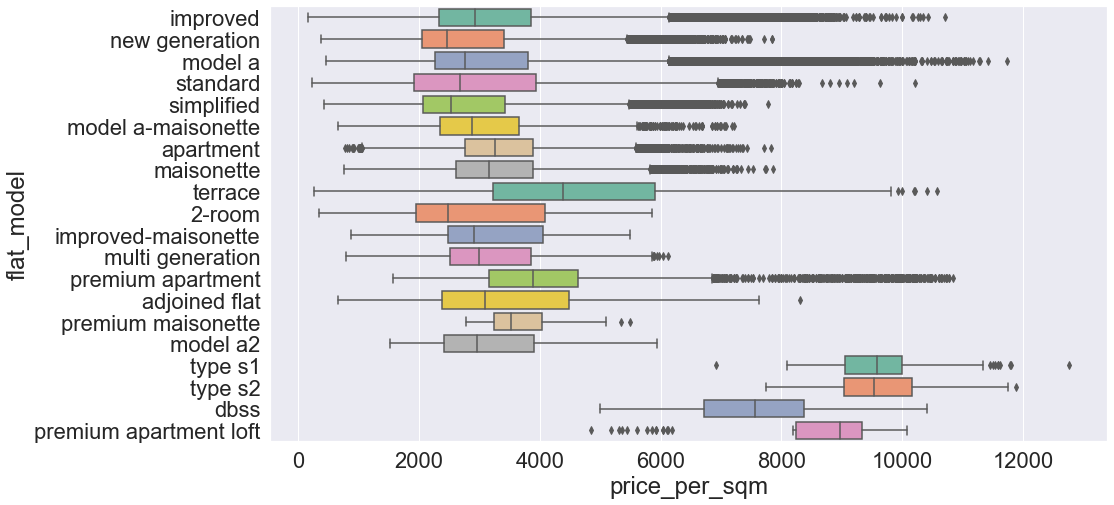

In [32]:
sns.set(font_scale = 2)
fig = plt.figure(figsize=(15,8))
ax = sns.boxplot(x='price_per_sqm', y='flat_model', data=proj_df, orient="h", palette="Set2")

In [33]:
drop_list = ['terrace', 'premium apartment', 'premium maisonette', 'type s1', 'type s2', 'dbss', 'premium apartment loft']
for i in drop_list:
    drop_ind = proj_df[proj_df['flat_model'] == i].index
    proj_df.drop(drop_ind, inplace = True)

In [34]:
proj_df['flat_model'].value_counts()

model a                234930
improved               222342
new generation         179801
simplified              54623
standard                40437
apartment               32802
maisonette              27550
model a2                 9284
model a-maisonette       1932
adjoined flat            1126
multi generation          516
improved-maisonette       116
2-room                     43
Name: flat_model, dtype: int64

**Add year and format month**

In [35]:
proj_df['year'] = proj_df['month'].str[0:4].astype(int)
proj_df['year']

0         1990
1         1990
2         1990
3         1990
4         1990
          ... 
846423    2014
846424    2014
846425    2014
846426    2014
846427    2014
Name: year, Length: 805502, dtype: int32

In [36]:
#Convert month into numbers
proj_df['month'] =  proj_df['month'].str.replace('-','').astype(int)
proj_df.dtypes

month                    int32
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
region                  object
price_per_sqm          float64
year                     int32
dtype: object

In [37]:
proj_df['month'].describe()

count    805502.000000
mean     200428.699181
std         812.170891
min      199001.000000
25%      199807.000000
50%      200304.000000
75%      201008.000000
max      202106.000000
Name: month, dtype: float64

**Add storey**

In [38]:
def s_min (text):
    elements = text.split()
    return int(elements[0])

def s_max (text):
    elements = text.split()
    return int(elements[2])

In [39]:
#Add max and min storey
proj_df['max_storey'] = proj_df['storey_range'].apply(s_max)
proj_df['min_storey'] = proj_df['storey_range'].apply(s_min)

In [40]:
df_test = proj_df[['min_storey', 'max_storey']]
df_test.groupby('min_storey').agg('max')

,max_storey
min_storey,
1,5
4,6
6,10
7,9
10,12
11,15
13,15
16,20
19,21


In [41]:
#use Cut to 5 bin
proj_df['min_level'] = pd.cut(x=proj_df['min_storey'], bins= [0, 5, 9, 20, 35, 100],labels=['1 to 5','6 to 9', '10 to 20', '21 to 35', '36 to 48'])
proj_df['max_level'] = pd.cut(x=proj_df['max_storey'], bins= [0, 6, 10, 21, 36, 100],labels=['1 to 5','6 to 9', '10 to 20', '21 to 35', '36 to 48'])

In [42]:
#check bin categories 
df_test = proj_df[proj_df['min_level']!= proj_df['max_level']]
df_test

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,region,price_per_sqm,year,max_storey,min_storey,min_level,max_level


In [43]:
proj_df['storey']=proj_df['min_level']
proj_df['storey'].value_counts()

1 to 5      375025
10 to 20    232873
6 to 9      187747
21 to 35      9596
36 to 48       261
Name: storey, dtype: int64

In [44]:
#drop unused columns min_level, max_level, storey_range, remaining_lease
proj_df.drop(columns=['min_level','max_level', 'storey_range', 'remaining_lease'], inplace=True)

In [46]:
proj_df.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,price_per_sqm,year,max_storey,min_storey
count,805502.000000,805502.000000,805502.000000,8.055020e+05,805502.000000,805502.000000,805502.000000,805502.000000
mean,200428.699181,95.062522,1986.566746,2.907293e+05,3016.881915,2004.221463,8.479368,6.463919
std,812.170891,26.290598,9.119155,1.483474e+05,1269.518823,8.122487,4.541643,4.541314
min,199001.000000,28.000000,1966.000000,5.000000e+03,161.290323,1990.000000,3.000000,1.000000
25%,199807.000000,70.000000,1980.000000,1.800000e+05,2216.666667,1998.000000,6.000000,4.000000
50%,200304.000000,92.000000,1985.000000,2.710000e+05,2761.194030,2003.000000,9.000000,7.000000
75%,201008.000000,113.000000,1993.000000,3.800000e+05,3762.376238,2010.000000,12.000000,10.000000
max,202106.000000,243.000000,2019.000000,1.210000e+06,11741.935484,2021.000000,48.000000,46.000000


# 4. CDF price

In [47]:
proj_df['month'].value_counts().sum()

805502

In [48]:
df_90s = proj_df[proj_df['month']<200001]
df_00s = proj_df[proj_df['month'].between(200001,200912)]
df_10s = proj_df[proj_df['month'].between(201001,201912)]
df_20s = proj_df[proj_df['month']>=202001]

In [49]:
print(len(proj_df), len(df_90s), len(df_00s), len(df_10s), len(df_20s))

805502 286943 295559 192355 30645


In [50]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x,y

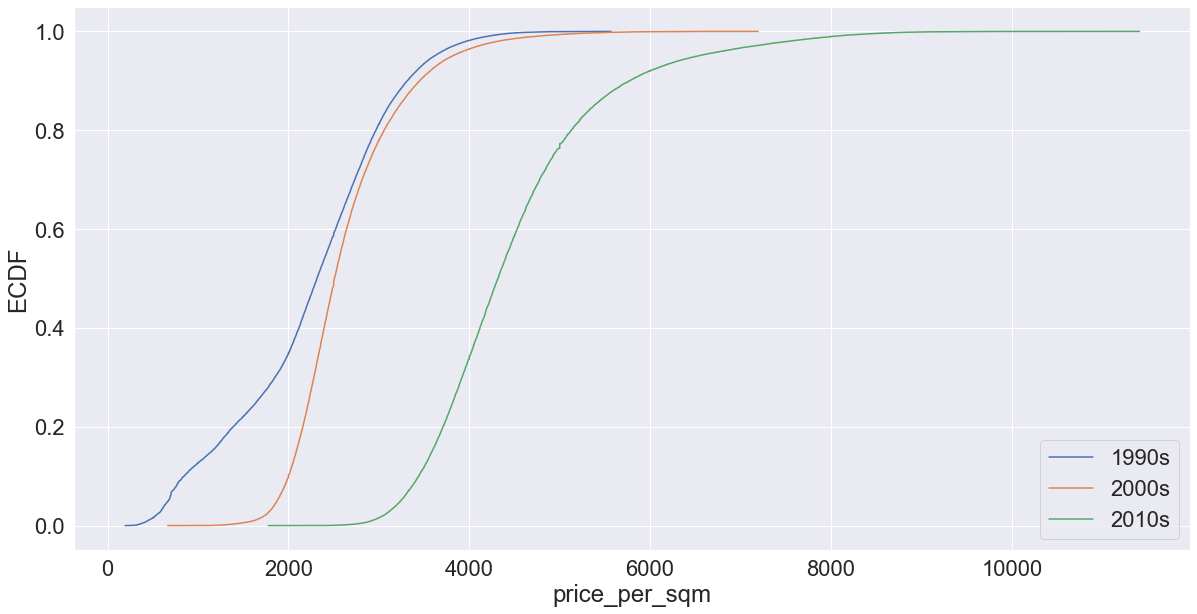

In [51]:
sample_90s = df_90s['price_per_sqm'].sample(100000)
sample_00s = df_00s['price_per_sqm'].sample(100000)
sample_10s = df_10s['price_per_sqm'].sample(100000)
x1, y1 = ecdf(sample_90s)
x2, y2 = ecdf(sample_00s)
x3, y3 = ecdf(sample_10s)
plt.figure(figsize=(20,10))
_ = plt.plot(x1, y1)
_ = plt.plot(x2, y2)
_ = plt.plot(x3, y3)
plt.legend(('1990s', '2000s', '2010s'), loc='lower right')
_ = plt.xlabel('price_per_sqm')
_ = plt.ylabel('ECDF')
plt.show()

# 5. Analyse price and volume by storey

In [52]:
df_count_by_storey = proj_df[['year','storey','price_per_sqm']]
df_count_by_storey['count'] = df_count_by_storey['storey'].notnull()
df_count_by_storey = df_count_by_storey.groupby(['year','storey']).agg({'price_per_sqm':'mean', 'count':'sum'})
df_count_by_storey.reset_index(inplace = True)

<ipython-input-52-fe6ceb5cab26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_by_storey['count'] = df_count_by_storey['storey'].notnull()


In [53]:
df_count_by_storey = df_count_by_storey[df_count_by_storey['price_per_sqm'].notna()]

Text(0.5, 1.0, 'Average resale price by year')

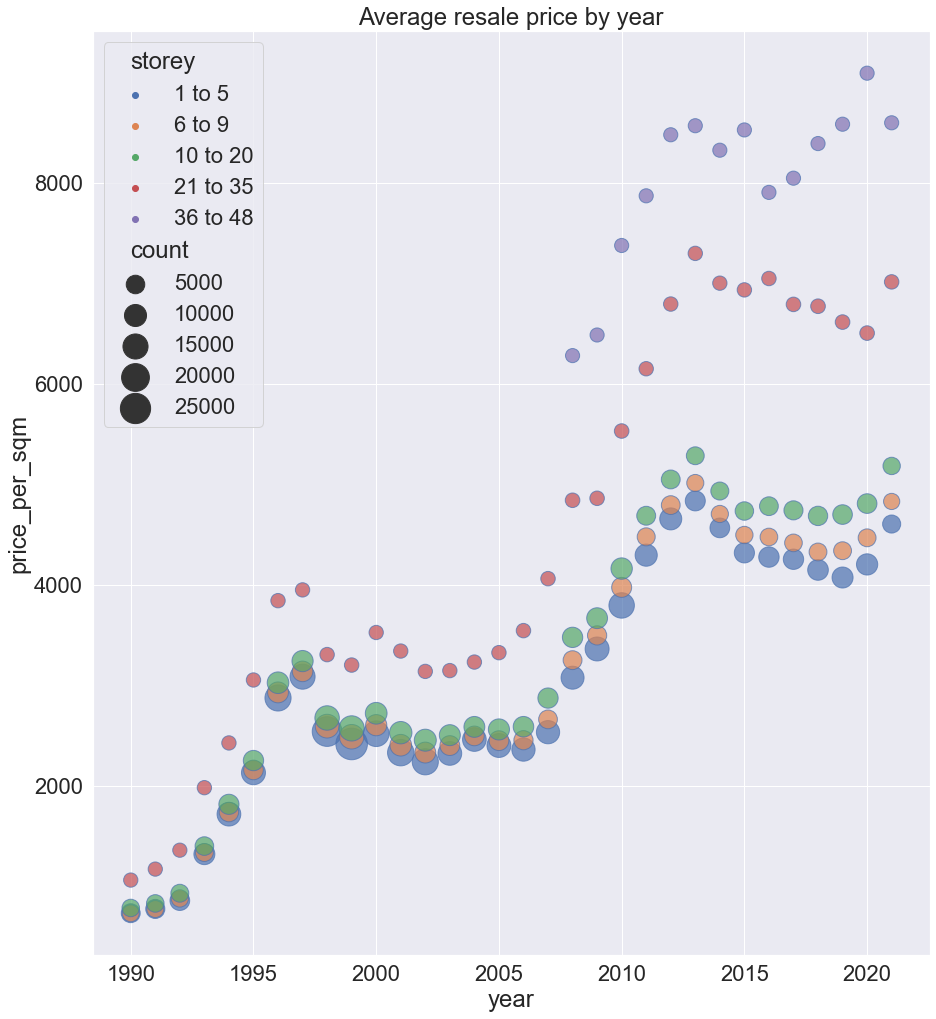

In [54]:
plt.figure(figsize=(15,17))
ax = sns.scatterplot(data = df_count_by_storey, x='year', y='price_per_sqm', hue = 'storey', size='count', sizes = (200,1000), legend='brief', edgecolor='b',linewidth=1,alpha=0.7)
ax.set_title('Average resale price by year')

# 6. Analyse price and volume by regions

In [55]:
region_count = proj_df.groupby('region').year.value_counts().unstack(level=0)
region_count.head()

region,C,E,N,NE,W
year,,,,,
1990,3936,2084,907,2556,3008
1991,3765,2003,1307,3012,2749
1992,4145,3350,1416,2415,3161
1993,4888,4328,2436,2684,3754
1994,6100,6416,3466,3898,6467


In [56]:
region_price = proj_df.groupby(['region','year']).agg('mean')['price_per_sqm'].unstack(level=0)
region_price.head()

region,C,E,N,NE,W
year,,,,,
1990,750.519801,793.269605,645.953714,781.756173,742.690858
1991,824.972980,836.362500,699.769619,787.266137,788.557129
1992,939.564202,896.492614,795.148426,898.214996,859.540190
1993,1406.452802,1350.684348,1345.427608,1369.978215,1293.810551
1994,1826.858340,1831.446864,1695.987236,1748.944469,1658.089794


Text(0.5, 1.0, 'Price and Volume by Region')

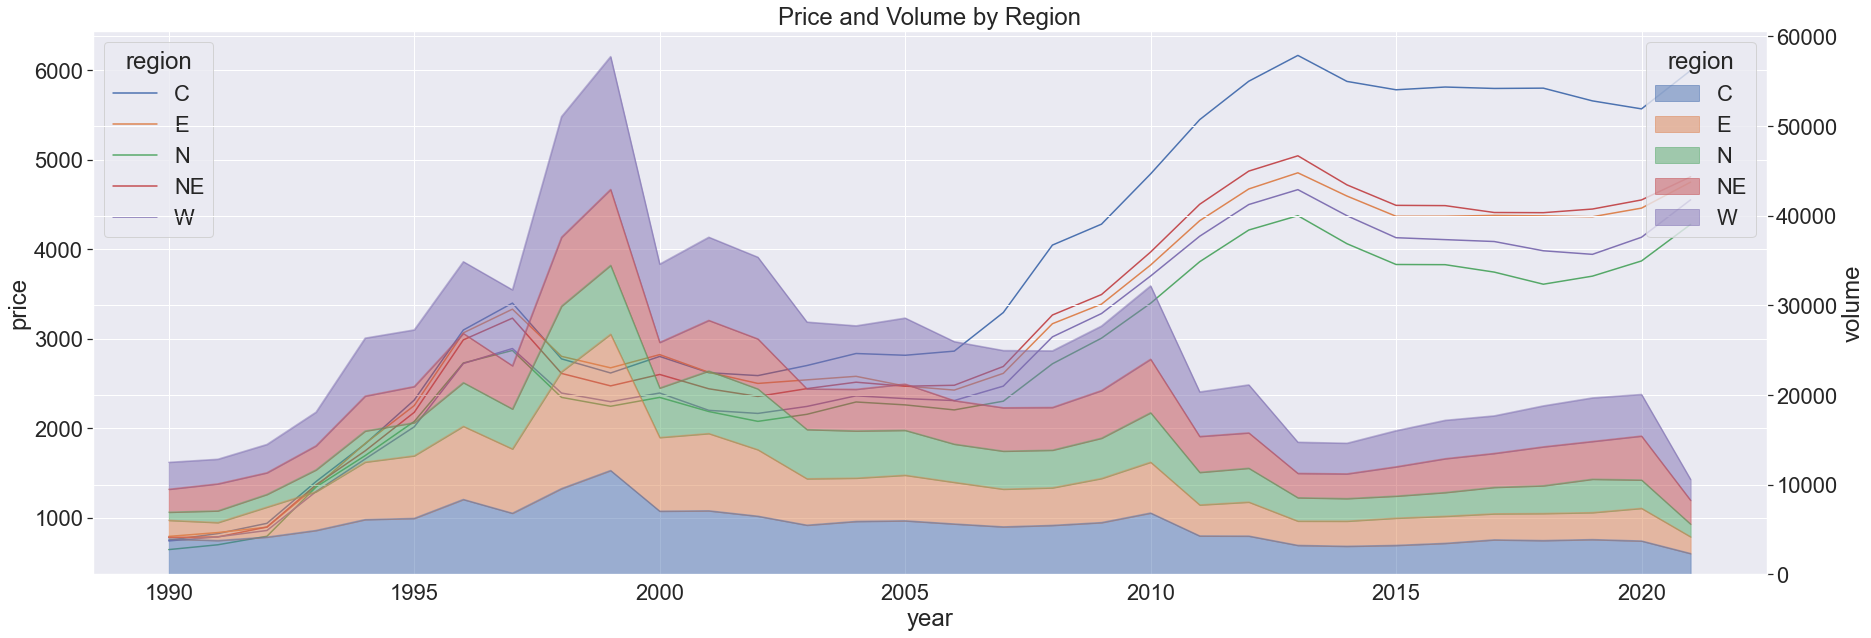

In [57]:

plt.figure(figsize=(30,10))
ax = sns.lineplot(data = region_price, dashes=False)
plt.ylabel('price')
ax2 = ax.twinx()
ax2 = region_count.plot.area(ax=ax2, alpha=0.5)
plt.ylabel('volume')
plt.title('Price and Volume by Region')

# 7. Analyse returns by age of property

In [58]:
period_lease = proj_df[proj_df['lease_commence_date']>=1990][['lease_commence_date','price_per_sqm','year']]
period_lease.head()

,lease_commence_date,price_per_sqm,year
17812,1990,894.230769,1991
23271,1992,1310.679612,1991
25631,1992,1120.689655,1992
27013,1990,1298.076923,1992
28304,1990,1093.750000,1992


In [59]:
#create 2d data frame with average price per year
price_year = proj_df.groupby('year').agg('mean')['price_per_sqm']
price_year.head()

year
1990     754.565903
1991     797.354737
1992     891.134797
1993    1356.105647
1994    1757.807073
Name: price_per_sqm, dtype: float64

In [60]:
len(price_year.index.tolist())

32

In [61]:
len(price_year.tolist())

32

In [62]:
period_lease['initial_price'] = period_lease['lease_commence_date']
period_lease['initial_price'].replace(price_year.index.tolist(),price_year.tolist(), inplace=True)

In [63]:
period_lease['return']=((period_lease['price_per_sqm'] / period_lease['initial_price'])-1)*100

In [64]:
period_lease['years_own'] = period_lease['year']-period_lease['lease_commence_date']

In [65]:
#Clean up data where year 
proj_df[proj_df['year']<proj_df['lease_commence_date']].value_counts().sum()

51

In [66]:
period_lease = period_lease[period_lease['years_own']>=1]

In [67]:
period_lease.head()

,lease_commence_date,price_per_sqm,year,initial_price,return,years_own
17812,1990,894.230769,1991,754.565903,18.509300,1
27013,1990,1298.076923,1992,754.565903,72.029629,2
28304,1990,1093.750000,1992,754.565903,44.950891,2
34063,1990,2176.870748,1992,754.565903,188.493124,2
35369,1990,873.786408,1992,754.565903,15.799880,2


In [68]:
period_lease_abs = period_lease.groupby(['lease_commence_date','years_own']).agg('mean')['return'].unstack(level=0)

In [69]:
period_lease_abs.fillna(value=0, inplace=True)
period_lease_abs.head()

lease_commence_date,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
years_own,,,,,,,,,,,,,,,,,,,,,
1,18.509300,0.000000,139.583278,68.609842,60.479615,56.570968,0.000000,0.000000,0.000000,0.000000,...,53.621426,0.000000,55.841516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.007507
2,64.180885,192.909317,161.396635,129.668121,104.170747,54.572234,40.685634,19.783640,47.588521,0.000000,...,48.683565,0.000000,56.510597,64.072292,0.000000,91.010349,127.593799,0.000000,93.141213,117.616760
3,92.805758,150.626451,250.664025,145.668907,68.666668,30.669202,-4.725297,-2.416856,-7.901049,-1.686091,...,47.421611,23.831738,29.591606,31.561838,2.475751,9.801305,37.476205,13.269610,70.653096,0.000000
4,177.054608,212.396890,311.090807,146.502875,53.913914,26.749087,-3.320802,-15.503180,-5.790900,0.610727,...,38.820796,24.463682,10.602566,13.803306,3.122583,6.901683,16.815768,21.665398,0.000000,0.000000
5,213.182836,279.686775,314.303279,118.182756,49.493317,33.949291,-11.446380,-19.503564,-4.770004,3.759483,...,26.824932,30.638977,10.684474,12.054823,2.287700,9.355422,24.033536,0.000000,0.000000,0.000000


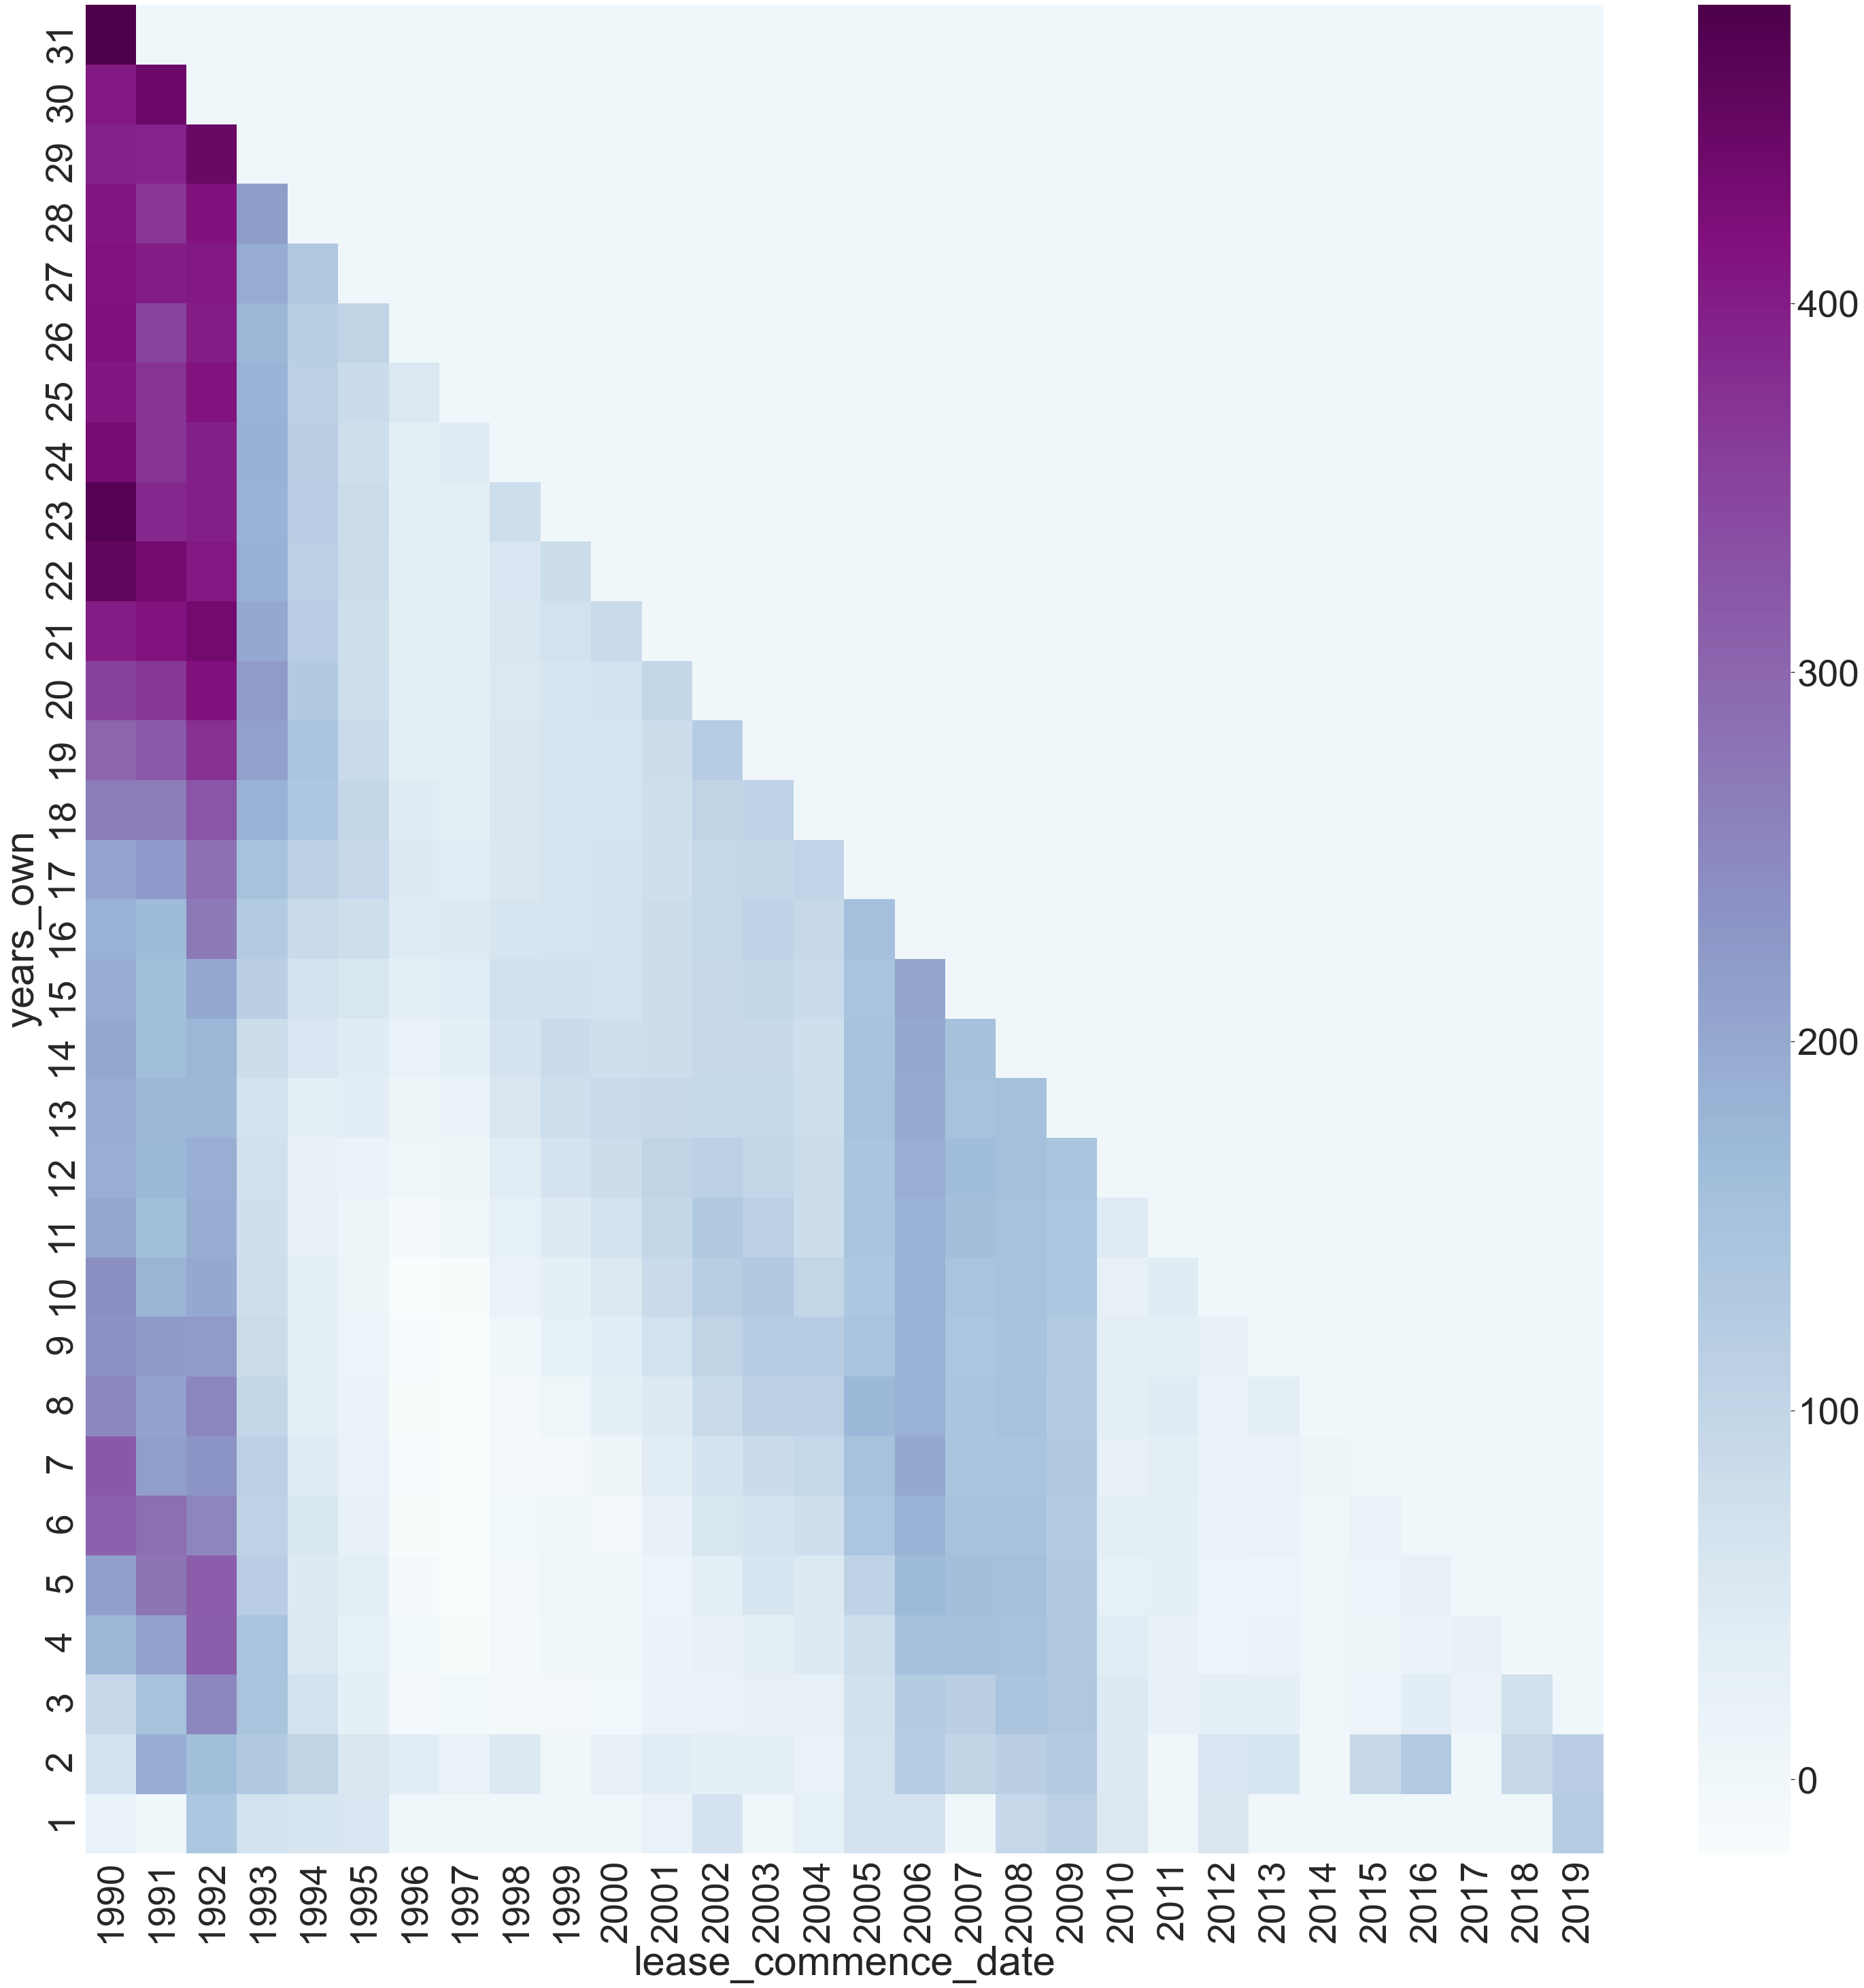

In [70]:
plt.figure(figsize=(50,50))
sns.set(font_scale=5)
ax = sns.heatmap(period_lease_abs, cmap='BuPu')
ax.invert_yaxis()
